In [1]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [2]:
#conda install pydotplus

In [3]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [4]:
print(df.head())
print(y[0:5])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0]


In [5]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier()

In [6]:
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydot
features = list(df.columns)
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
#conda install pydot

In [8]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

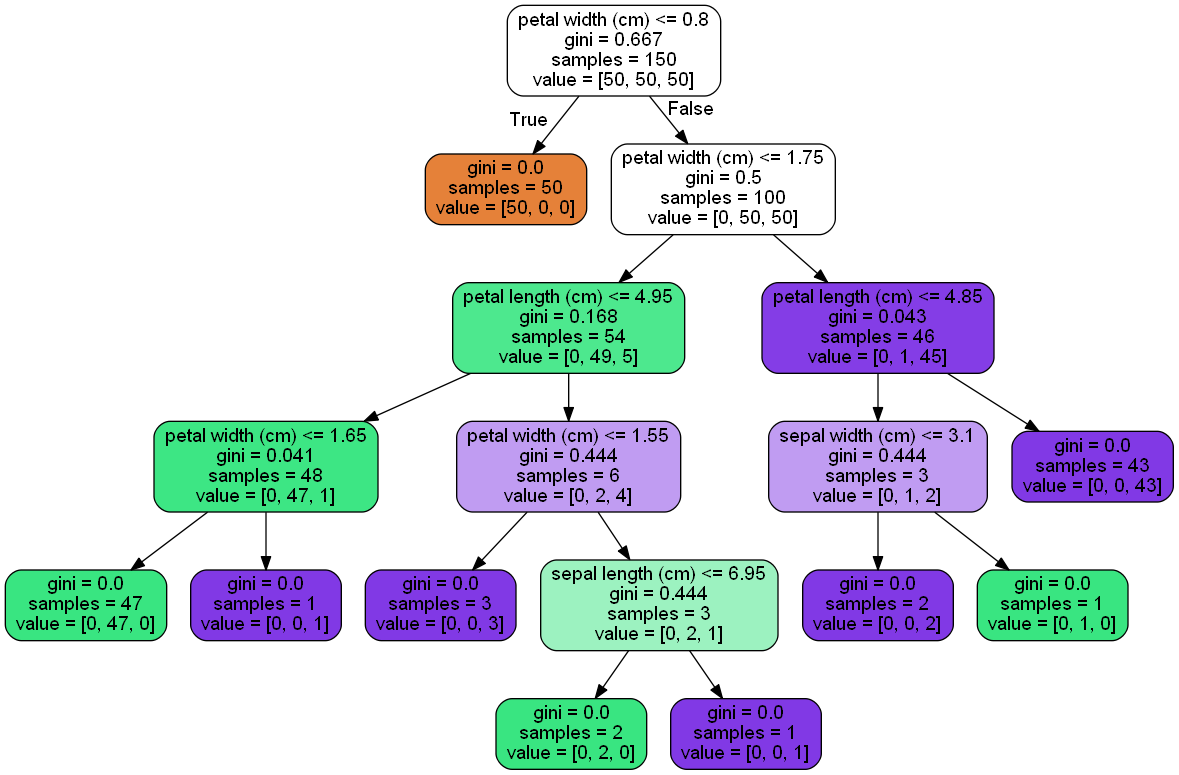

In [9]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [10]:
from sklearn.model_selection import train_test_split
X=df
Y=y
tr_x, ts_x, tr_y, ts_y=train_test_split(X,Y, test_size=0.3,random_state=123)

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(tr_x,tr_y)

DecisionTreeClassifier()

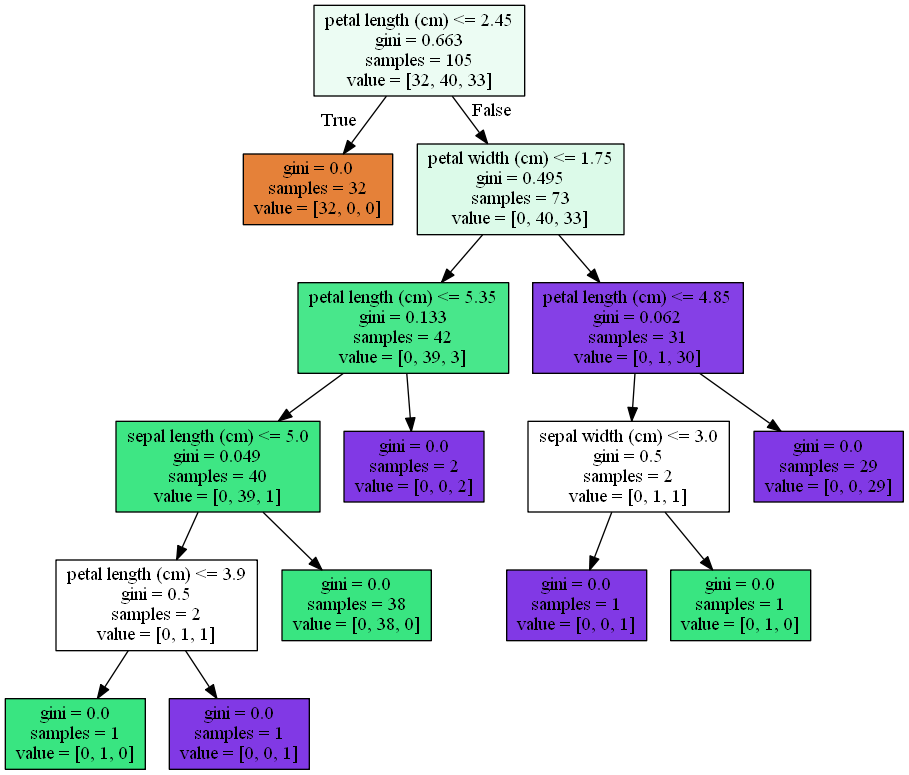

In [12]:
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydot 
features = list(tr_x.columns)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=False)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [13]:
ts_x[0:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
72,6.3,2.5,4.9,1.5
112,6.8,3.0,5.5,2.1
132,6.4,2.8,5.6,2.2
88,5.6,3.0,4.1,1.3
37,4.9,3.6,1.4,0.1


In [14]:
ts_y

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [15]:
pred=dtree.predict(ts_x)
pred

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [16]:
from sklearn.metrics import classification_report, accuracy_score
accuracy_score(ts_y, pred)

0.9555555555555556

In [17]:
print(classification_report(ts_y,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



# Create a function which predicts Species
- Inputs are features or predictors
- Output is label 

In [18]:
def Length_of_string(a):
    """
    This function returns Length of string a
    """
    L=len(a)
    return L

In [19]:
Length_of_string('')

0

In [20]:
len('Hi there...')

11

In [22]:
x=float(input("Write anything="))
print(type(x))

Write anything=12
<class 'float'>


In [23]:
def DT_predictor(model):
    """
    Enter Values of predictors and using DT model predict class labels
    """
    Input={'sepal length (cm)':pd.Series(float(input('Enter sepal length='))),
           'sepal width (cm)':pd.Series(float(input('Enter sepal width='))), 
           'petal length (cm)':pd.Series(float(input('Enter petal length='))),
           'petal width (cm)':pd.Series(float(input('Enter petal width=')))}
    df=pd.DataFrame(Input)
    Pred=model.predict(df) #label prediction
    Pred_prob=model.predict_proba(df) #Probability prebility
    out=print("\n\n For your inputs \n {} \n The Precicted label is = {} \n Probability = {}".format(df, Pred[0], Pred_prob))
    return out

In [24]:
DT_predictor(dtree)

Enter sepal length=4.8
Enter sepal width=3
Enter petal length=1.4
Enter petal width=0.1


 For your inputs 
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                4.8               3.0                1.4               0.1 
 The Precicted label is = 0 
 Probability = [[1. 0. 0.]]
